# question 1

step 1 import libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

step 2 create a data frame with pandas

In [7]:
wine = load_wine()

wine_df = pd.DataFrame(wine.data , columns = wine.feature_names)

wine_df['class'] = wine.target

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

step 3 train and test datas

In [4]:
x_train,x_test,y_train,y_test = train_test_split(wine_df.iloc[:,:-1],wine_df['class'],test_size=0.3,random_state=42)


step 4 KNN with k = 3

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

knn_without_pca = accuracy_score(y_test,y_pred)*100
print("knn without pca:",knn_without_pca)


knn without pca: 74.07407407407408


step 5 use PCA 

In [8]:
pca = PCA(n_components=2)
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x_train)
scaled_test = scaler.fit_transform(x_test)
x_train_pca = pca.fit_transform(scaled_x)
x_test_pca = pca.fit_transform(scaled_test)
# train KNN again

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca,y_train)

y_pred = knn.predict(x_test_pca)

knn_with_pca = accuracy_score(y_test,y_pred)*100
print("knn with pca:",knn_with_pca)


knn with pca: 96.29629629629629


step 6 rule based accuracy

rule based accuracy: 48.148148148148145


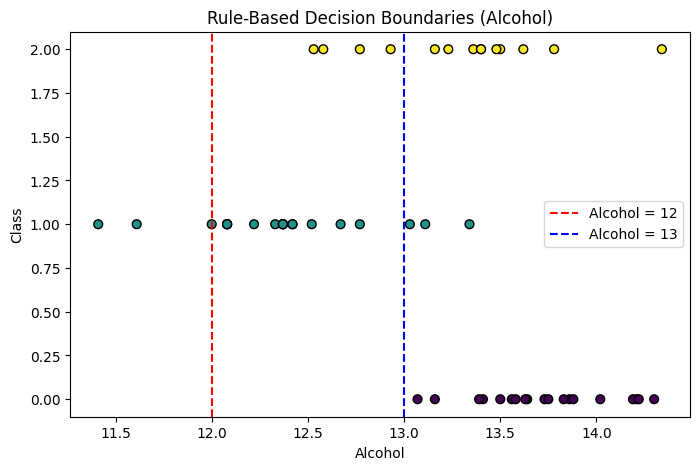

In [12]:
r_pred = []

for i in range(len(x_test)):
    if x_test.iloc[i,0] < 12:
        r_pred.append(0)
    elif (x_test.iloc[i,0] >= 12) and (x_test.iloc[i,0] < 13):
        r_pred.append(1)
    elif x_test.iloc[i,0] >= 13:
        r_pred.append(2)

r_pred = np.array(r_pred)
rule_based_acc = accuracy_score(y_test,r_pred)*100
print("rule based accuracy:",rule_based_acc)

plt.figure(figsize=(8,5))
plt.scatter(x_test.iloc[:,0], y_test, c=y_test, cmap='viridis', s=40, edgecolor='black')
plt.axvline(12, color='red', linestyle='--', label='Alcohol = 12')
plt.axvline(13, color='blue', linestyle='--', label='Alcohol = 13')
plt.xlabel("Alcohol")
plt.ylabel("Class")
plt.title("Rule-Based Decision Boundaries (Alcohol)")
plt.legend()
plt.show()


step 7 change KNN metrics 

In [18]:
# Euclidean distance
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

knn_without_pca = accuracy_score(y_test,y_pred)*100
print("knn with euclidean:",knn_without_pca)
# manhattan distance
knn = KNeighborsClassifier(n_neighbors=3,metric='manhattan')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

knn_without_pca = accuracy_score(y_test,y_pred)*100
print("knn with manhattan:",knn_without_pca)
# chebyshev distance
knn = KNeighborsClassifier(n_neighbors=3,metric='chebyshev')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

knn_without_pca = accuracy_score(y_test,y_pred)*100
print("knn with chebyshev:",knn_without_pca)
# cosine distance
knn = KNeighborsClassifier(n_neighbors=3,metric='cosine')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

knn_without_pca = accuracy_score(y_test,y_pred)*100
print("knn with cosine:",knn_without_pca)

# mahalanobis distance
knn = KNeighborsClassifier(n_neighbors=3,metric='mahalanobis',metric_params={'V':np.cov(x_train.T)})
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

knn_without_pca = accuracy_score(y_test,y_pred)*100
print("knn with mahalanobis:",knn_without_pca)


knn with euclidean: 74.07407407407408
knn with manhattan: 79.62962962962963
knn with chebyshev: 74.07407407407408
knn with cosine: 77.77777777777779
knn with mahalanobis: 90.74074074074075


step 8 Decision Boundary

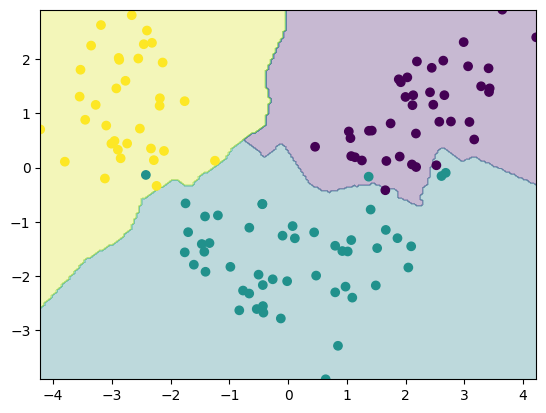

array([[-4.21872658, -3.90125391],
       [-4.17629387, -3.90125391],
       [-4.13386116, -3.90125391],
       ...,
       [ 4.14051809,  2.91051718],
       [ 4.18295081,  2.91051718],
       [ 4.22538352,  2.91051718]], shape=(40000, 2))

In [ ]:
# fit model on pca data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca,y_train)

x_min = x_train_pca[:,0].min() 
x_max = x_train_pca[:,0].max() 
y_min = x_train_pca[:,1].min() 
y_max = x_train_pca[:,1].max() 

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))

plot_pred = knn.predict(np.c_[xx.ravel(), yy.ravel()])
plot_pred = plot_pred.reshape(xx.shape)

plt.contourf(xx, yy, plot_pred, alpha=0.3)   
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train)  
plt.show()



step 9 soft encoding and linear regression

In [25]:
# soft classes
soft_y_train = y_train * 0.5

lin_reg = LinearRegression()
lin_reg.fit(x_train,soft_y_train)

soft_predict = lin_reg.predict(x_test)
round_predict = np.abs(np.round(soft_predict*2)).astype(int)

soft_acc = accuracy_score(np.array(y_test),round_predict)*100
print("soft accuracy:",soft_acc)

soft accuracy: 94.44444444444444


step 10 Decision Boundary

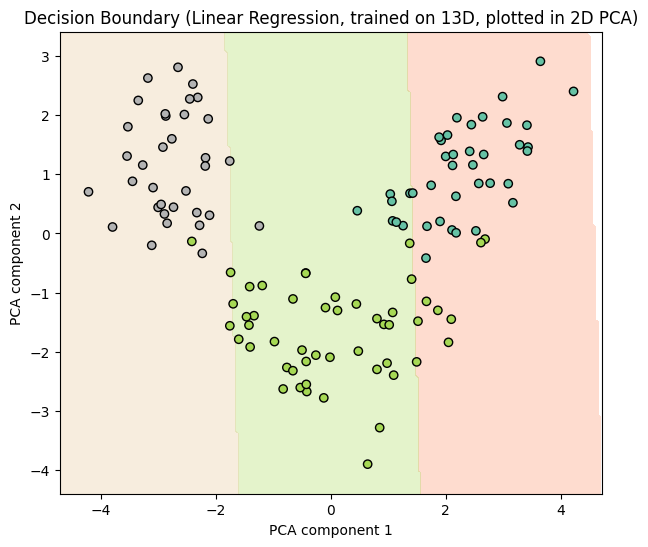

In [34]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)

soft_y_train = y_train * 0.5

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, soft_y_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)


x_min, x_max = X_train_pca[:,0].min()-0.5, X_train_pca[:,0].max()+0.5
y_min, y_max = X_train_pca[:,1].min()-0.5, X_train_pca[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_pca = np.c_[xx.ravel(), yy.ravel()]

grid_13d = pca.inverse_transform(grid_pca)

plot_pred = lin_reg.predict(grid_13d)
plot_pred_cls = np.round(plot_pred*2).astype(int).reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, plot_pred_cls, levels=[-0.5, 0.5, 1.5, 2.5], alpha=0.3, cmap=plt.cm.Set2)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap=plt.cm.Set2, edgecolor='black')
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("Decision Boundary (Linear Regression, trained on 13D, plotted in 2D PCA)")
plt.show()